In [1]:
import pyscf
import pyscf.tools
import pyscf.cc
import pyscf.qmmm
from pyscf import lib
from pyscf import gto
from pyscf import df
from pyscf import scf
from pyscf import mcscf
from pyscf import grad
from pyscf.lib import logger
from pyscf.gto import M
from pyscf.scf import RHF
import pyscf.lib
import numpy as np
import numpy
import matplotlib.pyplot as plt
angstrom=1.889725989
from numpy.linalg import inv,norm

In [2]:
def qmmmcalc(mol,dh):
    deltaZ = np.array((dh,-dh))
    mf = pyscf.qmmm.mm_charge(pyscf.scf.RHF(mol), mol.atom_coords(), deltaZ,unit='bohr')
    class NoSelfQMMM(mf.__class__):
        def energy_nuc(self):
            e_nuc=(mol.atom_charge(0)+dh)*(mol.atom_charge(1)-dh)/np.linalg.norm(self.mol.atom_coords()[0]-self.mol.atom_coords()[1])
            return e_nuc
    mf = NoSelfQMMM()
    return mf

In [57]:
CO=M(atom='C 0 0 0;O 0 0 2.',basis= 'def2-TZVP',unit='bohr')
NN=M(atom='N 0 0 0;N 0 0 2.',basis= 'def2-TZVP',unit='bohr')
nnhf=RHF(NN)
nn_co=qmmmcalc(CO,1)

In [58]:
print(nn_co.energy_nuc())
CO.energy_nuc()

24.5


24.0

In [59]:
nn_co.kernel()
nnhf.kernel()

converged SCF energy = -108.898047903918
converged SCF energy = -108.991204984885


-108.99120498488537

In [60]:
#single atom qmmmm
def saqmmm(mol,dh):
    mf = pyscf.qmmm.mm_charge(pyscf.scf.RHF(mol), mol.atom_coords(), np.asarray([dh]),unit='bohr')
    class NoSelfQMMM(mf.__class__):
        def energy_nuc(self):
            e_nuc=0
            return e_nuc
    mf = NoSelfQMMM()
    return mf

In [61]:
C=M(atom='C 0 0 0',basis='def2-TZVP',charge=-1,spin=1)
O=M(atom='O 0 0 0',basis='def2-TZVP',charge=1,spin=1)
N=M(atom='N 0 0 0',basis='def2-TZVP',spin=1)
nhf=pyscf.scf.UHF(N)
nchf=saqmmm(C,1)
nohf=saqmmm(O,-1)

In [62]:
nhf.kernel()
nchf.kernel()
nohf.kernel()

converged SCF energy = -54.2661030726021  <S^2> = 0.75563051  2S+1 = 2.0056226
converged SCF energy = -54.2024596995637
converged SCF energy = -54.2168031515304


-54.216803151530414

In [63]:
print('molecolar error due to basis set', nn_co.kernel()-nnhf.kernel())
print('atomic error due to basis set',nchf.kernel()+nohf.kernel()-2*nhf.kernel())

converged SCF energy = -108.898047903918
converged SCF energy = -108.991204984885
molecolar error due to basis set 0.09315708096713138
converged SCF energy = -54.2024596995638
converged SCF energy = -54.2168031515305
converged SCF energy = -54.266103072602  <S^2> = 0.7556305  2S+1 = 2.0056226
atomic error due to basis set 0.11294329410969794


In [64]:
CO=M(atom='C 0 0 0;O 0 0 2.',basis= 'sto-3G',unit='bohr')
NN=M(atom='N 0 0 0;N 0 0 2.',basis= 'sto-3G',unit='bohr')
nnhf=RHF(NN)
nn_co=qmmmcalc(CO,1)
nn_co.kernel()
nnhf.kernel()

converged SCF energy = -105.426870589041
converged SCF energy = -107.478024957254


-107.47802495725438

In [65]:
C=M(atom='C 0 0 0',basis='sto-3G',charge=-1,spin=1)
O=M(atom='O 0 0 0',basis='sto-3G',charge=1,spin=1)
N=M(atom='N 0 0 0',basis='sto-3G',spin=1)
nhf=pyscf.scf.UHF(N)
nchf=saqmmm(C,1)
nohf=saqmmm(O,-1)
nhf.kernel()
nchf.kernel()
nohf.kernel()

converged SCF energy = -53.5545360887047  <S^2> = 0.75  2S+1 = 2
converged SCF energy = -52.4503266150752
converged SCF energy = -52.3356987471301


-52.335698747130074

In [66]:
print('molecolar error due to basis set', nn_co.kernel()-nnhf.kernel())
print('atomic error due to basis set',nchf.kernel()+nohf.kernel()-2*nhf.kernel())

converged SCF energy = -105.426870589041
converged SCF energy = -107.478024957254
molecolar error due to basis set 2.0511543682132185
converged SCF energy = -52.4503266150752
converged SCF energy = -52.3356987471301
converged SCF energy = -53.5545360887047  <S^2> = 0.75  2S+1 = 2
atomic error due to basis set 2.3230468152041226


In [74]:
basis=['sto-3G','sto-6G','3-21G','6-31G*','cc-pVTZ','aug-ccpvqz','def2-TZVP','def2-QZVPP']
atoms_error={}
molecule_error={}
for base in basis:
    CO=M(atom='C 0 0 0;O 0 0 2.',basis=base ,unit='bohr')
    NN=M(atom='N 0 0 0;N 0 0 2.',basis=base,unit='bohr')
    nnhf=RHF(NN)
    nn_co=qmmmcalc(CO,1)
    C=M(atom='C 0 0 0',basis=base,charge=-1,spin=1)
    O=M(atom='O 0 0 0',basis=base,charge=1,spin=1)
    N=M(atom='N 0 0 0',basis=base,spin=1)
    nhf=pyscf.scf.RHF(N)
    nchf=saqmmm(C,1)
    nohf=saqmmm(O,-1)
    me=nn_co.kernel()-nnhf.kernel()
    ae=nchf.kernel()+nohf.kernel()-2*nhf.kernel()
    print('molecolar error due to basis set', me)
    print('atomic error due to basis set',ae)
    atoms_error.update({base:ae})
    molecule_error.update({base:me})

converged SCF energy = -105.426870589041
converged SCF energy = -107.478024957254
converged SCF energy = -52.4503266150752
converged SCF energy = -52.3356987471301
converged SCF energy = -53.5545360887047
molecolar error due to basis set 2.05115436821319
atomic error due to basis set 2.323046815204094
converged SCF energy = -106.460477445989
converged SCF energy = -108.523478472693
converged SCF energy = -53.0294531802803
converged SCF energy = -52.7760259243052
converged SCF energy = -54.0845800998906
molecolar error due to basis set 2.063001026703887
atomic error due to basis set 2.3636810951958296
converged SCF energy = -106.480338237707
converged SCF energy = -108.29889701394
converged SCF energy = -52.9123697614081
converged SCF energy = -53.1309572497241
converged SCF energy = -53.9598946415259
molecolar error due to basis set 1.8185587762333455
atomic error due to basis set 1.876462271919607
converged SCF energy = -107.094345834234
converged SCF energy = -108.94172152653
converg

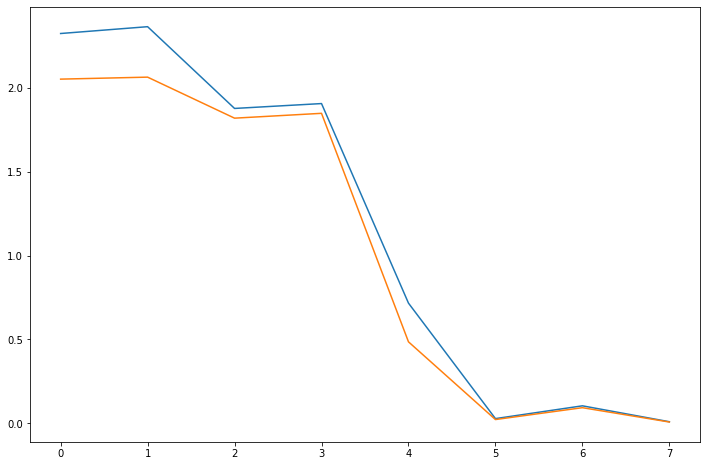

In [80]:
fig=plt.figure(figsize=(12,8))
plt.plot([atoms_error[x]for x in atoms_error.keys()])
plt.plot([molecule_error[x]for x in molecule_error.keys()])

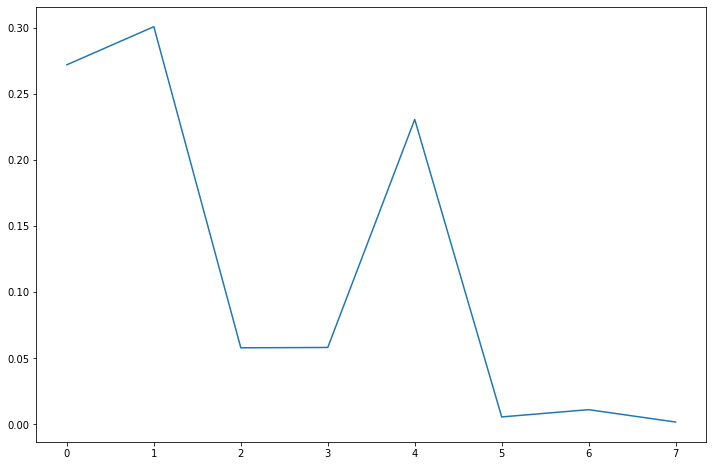

In [79]:
fig=plt.figure(figsize=(12,8))
plt.plot([atoms_error[x]-molecule_error[x] for x in molecule_error.keys()])

In [47]:
from pyscf import gto, scf, ao2mo, fci
mol = N
mf = scf.RHF(mol).run()
h1 = mf.mo_coeff.T.dot(mf.get_hcore()).dot(mf.mo_coeff)
eri = ao2mo.kernel(mol, mf.mo_coeff)
cisolver = fci.direct_spin1.FCI(mol)
e, ci = cisolver.kernel(h1, eri, h1.shape[1], mol.nelec, ecore=mol.energy_nuc(),verbose=5)
print(e)

converged SCF energy = -53.5545360887047
-53.719010162593925


In [50]:
mol = C
mf = saqmmm(mol,1).run()
h1 = mf.mo_coeff.T.dot(mf.get_hcore()).dot(mf.mo_coeff)
eri = ao2mo.kernel(mol, mf.mo_coeff)
cisolver = fci.direct_spin1.FCI(mol)
e, ci = cisolver.kernel(h1, eri, h1.shape[1], mol.nelec, ecore=mol.energy_nuc(),verbose=5)
print(e)

converged SCF energy = -52.4503266150752
-52.59540118080676


In [51]:
mol = O
mf = saqmmm(mol,-1).run()
h1 = mf.mo_coeff.T.dot(mf.get_hcore()).dot(mf.mo_coeff)
eri = ao2mo.kernel(mol, mf.mo_coeff)
cisolver = fci.direct_spin1.FCI(mol)
e, ci = cisolver.kernel(h1, eri, h1.shape[1], mol.nelec, ecore=mol.energy_nuc(),verbose=5)
print(e)

converged SCF energy = -52.3356987471301
-52.52547652760362
